Run the communication game in which input are binary vectors

### Prepare the format to use EGG framework

In [1]:
# from matplotlib.image import imread
# import numpy as np
# import pickle
# import h5py

In [2]:
# concept = []
# path = []
# images = []
# count = 0

# with open('../data/cifar10/cifar10-dataset/val.txt') as f:
#     for line in f:
#         tmp = line.strip().split(' ')
#         concept.append(int(tmp[1]))
#         path.append([f'tensor({str(count)})', './data/cifar10/' + tmp[0]])
#         count += 1
#         images.append(imread('../data/cifar10/cifar10-dataset/' + tmp[0]))
# images = np.array(images)
        
# with open('./data/cifar10/test/ours_images_single_sm0.objects', "wb") as f:
#     pickle.dump(np.array(concept), f, pickle.HIGHEST_PROTOCOL)
    
# with open('./data/cifar10/test/ours_images_paths_sm0.objects', "wb") as f:
#     pickle.dump(np.array(path), f, pickle.HIGHEST_PROTOCOL)
    
# h5f = h5py.File('./data/cifar10/test/ours_images_single_sm0.h5', 'w')
# h5f.create_dataset('cifar10_test', data=images)
# h5f.close()

### Compare bin communication

In [3]:
#! pip install git+https://github.com/facebookresearch/EGG.git

In [12]:
import json
import pandas as pd
import matplotlib.pyplot as plt

def plot_result(result_df, mode):
    fig,ax = plt.subplots()
    for col in ['acc','sender_entropy','receiver_entropy']:
        ax.plot(result_df[result_df['mode'] == mode]['epoch'],
                result_df[result_df['mode'] == mode][col],
                label=col)

    ax.set_xlabel("epoch")
    # ax.set_ylabel("weight")
    ax.legend(loc='best')

In [32]:
import os
import json
import seaborn as sns

In [28]:
def read_log(log_folder):
    paths = []
    for parent, _, filenames in os.walk(log_folder):
        for f in filenames:
            paths.append(os.path.join(parent, f))

    line_list = []
    for i in range(len(paths)):
        with open(paths[i]) as f:
            for line in f:
                item = json.loads(line)
                item['seed'] = filenames[i].split('_')[1]
                line_list.append(item)

    df = pd.DataFrame(line_list)
    return df

In [17]:
! for seed in 111 222 333 444 555 666 777 888 999 1110; \
    do \
        echo $seed; \
        python input_bin/train.py --root=./data/formatted/bin/DeepBit --n_epochs=10 --random_seed=$seed \
        > ./save/input_bin/DeepBit/seed_$seed; \
    done

111
222
333
444
555
666
777
888
999
1110


In [30]:
df_deepbit = read_log('./save/input_bin/DeepBit/')

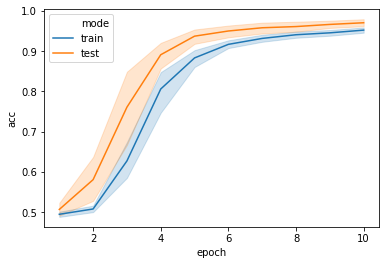

In [38]:
sns.lineplot(data=df_deepbit, x='epoch', y='acc', hue='mode')

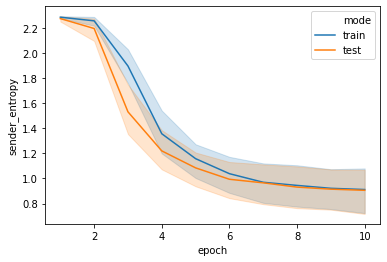

In [37]:
sns.lineplot(data=df_deepbit, x='epoch', y='sender_entropy', hue='mode')

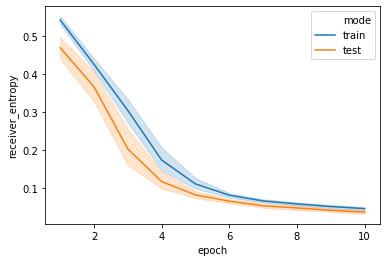

In [39]:
sns.lineplot(data=df_deepbit, x='epoch', y='receiver_entropy', hue='mode')

In [40]:
! for seed in 111 222 333 444 555 666 777 888 999 1110; \
    do \
        echo $seed; \
        python input_bin/train.py --root=./data/formatted/bin/GreedyHash --n_epochs=10 --random_seed=$seed \
        > ./save/input_bin/GreedyHash/seed_$seed; \
    done

111
222
333
444
555
666
777
888
999
1110


In [41]:
df_greedy = read_log('./save/input_bin/GreedyHash/')

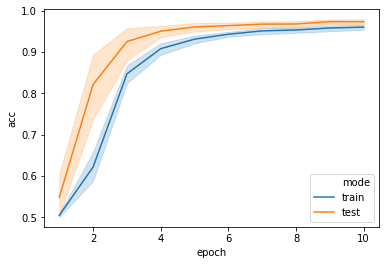

In [42]:
sns.lineplot(data=df_greedy, x='epoch', y='acc', hue='mode')

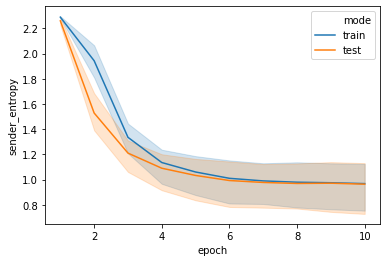

In [43]:
sns.lineplot(data=df_greedy, x='epoch', y='sender_entropy', hue='mode')

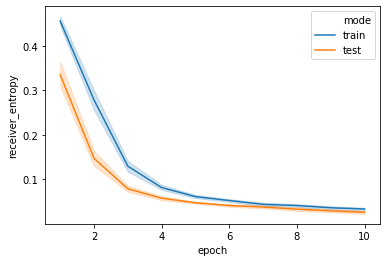

In [44]:
sns.lineplot(data=df_greedy, x='epoch', y='receiver_entropy', hue='mode')

In [45]:
! for seed in 111 222 333 444 555 666 777 888 999 1110; \
    do \
        echo $seed; \
        python input_bin/train.py --root=./data/formatted/bin/BiHalf --n_epochs=10 --random_seed=$seed \
        > ./save/input_bin/BiHalf/seed_$seed; \
    done

111
222
333
444
555
666
777
888
999
1110


In [46]:
df_bihalf = read_log('./save/input_bin/BiHalf/')

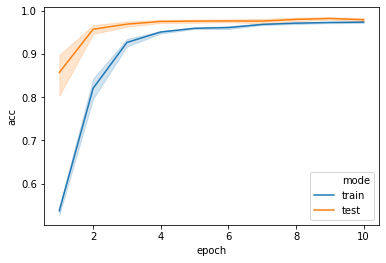

In [47]:
sns.lineplot(data=df_bihalf, x='epoch', y='acc', hue='mode')

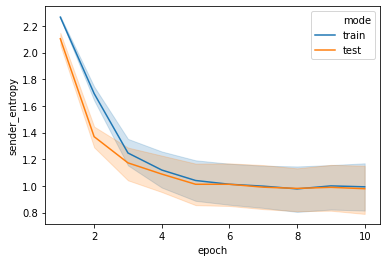

In [48]:
sns.lineplot(data=df_bihalf, x='epoch', y='sender_entropy', hue='mode')

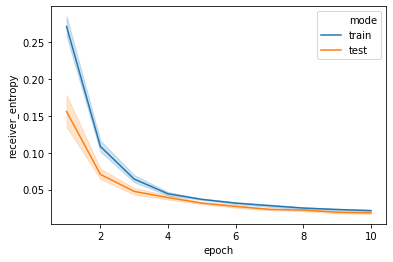

In [49]:
sns.lineplot(data=df_bihalf, x='epoch', y='receiver_entropy', hue='mode')